<ipython-input-6-01bd7114cc8d>:9: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


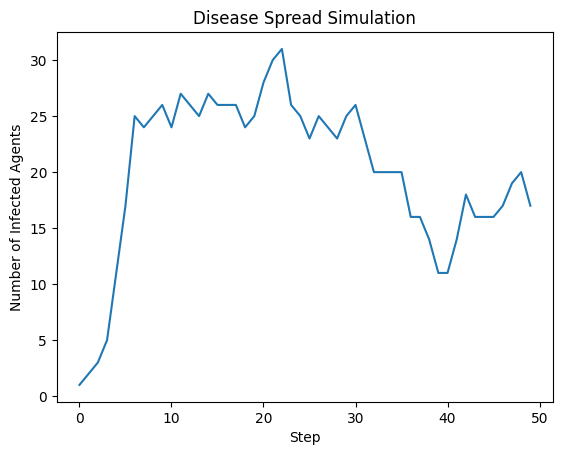

In [6]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
import numpy as np
import matplotlib.pyplot as plt

class Person(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.state = "Susceptible"  # Possible states: Susceptible, Infected, Recovered

    def step(self):
        if self.state == "Infected":
            for neighbor in self.model.grid.get_neighbors(self.pos, moore=True, radius=1):
                if neighbor.state == "Susceptible":
                    if np.random.random() < self.model.infection_rate:
                        neighbor.state = "Infected"
            if np.random.random() < self.model.recovery_rate:
                self.state = "Recovered"

class DiseaseModel(Model):
    def __init__(self, width, height, population, infection_rate, recovery_rate):
        self.num_agents = population
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.infection_rate = infection_rate
        self.recovery_rate = recovery_rate

        for i in range(self.num_agents):
            a = Person(i, self)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        patient_zero = self.schedule.agents[0]
        patient_zero.state = "Infected"

    def step(self):
        self.schedule.step()

# Parameters
width, height = 20, 20
population = 200
infection_rate = 0.3
recovery_rate = 0.1
num_steps = 50

# Run the model
model = DiseaseModel(width, height, population, infection_rate, recovery_rate)

infected_counts = []
for i in range(num_steps):
    model.step()
    infected_count = sum(1 for a in model.schedule.agents if a.state == "Infected")
    infected_counts.append(infected_count)

# Plot the results
plt.plot(infected_counts)
plt.xlabel("Step")
plt.ylabel("Number of Infected Agents")
plt.title("Disease Spread Simulation")
plt.show()
